<a href="https://colab.research.google.com/github/TarfaGaida/Project-Sentiment-Analysis/blob/main/customer_satisfaction_sentiment_analysis_Tarfa_Gaida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Satisfaction and Sentiment Analysis




In [ ]:
import numpy as np
import pandas as pd
import os

pd.options.display.max_columns = 999
pd.options.display.float_format = "{:.2f}".format


from google.colab import drive
drive.mount('/content/drive/')

# Where is your data_path
data_path = '/content/drive/My Drive/Data Science/Final Project DA/Dataset/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Data

Data survey of various [Amazone Consumer Review](https://drive.google.com/file/d/1Iepx_DDcxFGO2lOVZlIcMAKFGF0iavWL/view?usp=sharing).


In [ ]:
# Read data
file_name = data_path + 'Amazon_Consumer_Reviews_of_Amazon_Products.csv'

df_review = pd.read_csv(file_name)

df_review.head()

<ipython-input-2-efd10ed8a491>:4: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_review = pd.read_csv(file_name)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.00,4.00,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
df_review.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.00,34131.00,34627.00,0.00,0.00
mean,111372787.00,0.63,4.58,NaN,NaN
std,NaN,13.22,0.74,NaN,NaN
min,111372787.00,0.00,1.00,NaN,NaN
25%,111372787.00,0.00,4.00,NaN,NaN
50%,111372787.00,0.00,5.00,NaN,NaN
75%,111372787.00,0.00,5.00,NaN,NaN
max,111372787.00,814.00,5.00,NaN,NaN


In [ ]:
#checking shape of data
print(df_review.shape)

(34660, 21)


In [ ]:
df_review.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [ ]:
#Check missing value data
df_review.isnull().any()

,0
id,False
name,True
asins,True
brand,False
categories,False
keys,False
manufacturer,False
reviews.date,True
reviews.dateAdded,True
reviews.dateSeen,False


In [ ]:
df_review.isnull().sum()

,0
id,0
name,6760
asins,2
brand,0
categories,0
keys,0
manufacturer,0
reviews.date,39
reviews.dateAdded,10621
reviews.dateSeen,0


In [ ]:
# Dropping columns with no meaningful data (all or mostly empty)
columns_to_drop = ['reviews.didPurchase', 'reviews.userCity', 'reviews.userProvince', 'reviews.id','reviews.dateSeen','reviews.dateAdded']
cleaned_review = df_review.drop(columns=columns_to_drop)

In [ ]:
#Handling missing values: Drop rows with missing essential data ( reviews.text and reviews.rating), the missing data is sparse or insignificant
cleaned_review = cleaned_review.dropna(subset=['reviews.text', 'reviews.rating','reviews.date'])

In [ ]:
#Handling missing value with mode
column_ti_fill = ['name','reviews.numHelpful','reviews.doRecommend']
for col in column_ti_fill:
  cleaned_review[col].fillna(cleaned_review[col].mode()[0], inplace=True)

<ipython-input-11-fec771d534b3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_review[col].fillna(cleaned_review[col].mode()[0], inplace=True)
<ipython-input-11-fec771d534b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_review[col].fillna(cleaned_review[col].mode()[0], inplace=True)
<ipython-input-11-fec771d534b3>:4: Futu

In [ ]:
# Converting date columns to datetime format
date_columns = ['reviews.date', 'reviews.dateAdded', 'reviews.dateSeen']
for col in date_columns:
    if col in cleaned_review.columns:
        cleaned_review[col] = pd.to_datetime(cleaned_review[col], errors='coerce')

<ipython-input-12-83606f1b1c97>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_review[col] = pd.to_datetime(cleaned_review[col], errors='coerce')


In [ ]:
# Dropping duplicate reviews (based on `id` and `reviews.text`)
cleaned_review = cleaned_review.drop_duplicates(subset=['id', 'reviews.text'])

In [ ]:
cleaned_review.isnull().sum()

,0
id,0
name,0
asins,2
brand,0
categories,0
keys,0
manufacturer,0
reviews.date,60
reviews.doRecommend,0
reviews.numHelpful,0


In [ ]:
# Checking the cleaned dataset
cleaned_info = cleaned_review.info()
cleaned_head = cleaned_review.head()

cleaned_info, cleaned_head

<class 'pandas.core.frame.DataFrame'>
Index: 34597 entries, 0 to 34659
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   34597 non-null  object             
 1   name                 34597 non-null  object             
 2   asins                34595 non-null  object             
 3   brand                34597 non-null  object             
 4   categories           34597 non-null  object             
 5   keys                 34597 non-null  object             
 6   manufacturer         34597 non-null  object             
 7   reviews.date         34537 non-null  datetime64[ns, UTC]
 8   reviews.doRecommend  34597 non-null  bool               
 9   reviews.numHelpful   34597 non-null  float64            
 10  reviews.rating       34597 non-null  float64            
 11  reviews.sourceURLs   34597 non-null  object             
 12  reviews.text         34

(None,
                      id                                               name  \
 0  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
 1  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
 2  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
 3  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
 4  AVqkIhwDv8e3D1O-lebb  All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...   
 
         asins   brand                                         categories  \
 0  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
 1  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
 2  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
 3  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
 4  B01AHB9CN2  Amazon  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
 
                                                 keys

In [ ]:
cleaned_review.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,4.00,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [ ]:
cleaned_review.shape[0]

34597

#customer Satisfation & sentiment

In [ ]:
cleaned_review['reviews.rating'].value_counts()

,count
reviews.rating,
5.00,23755
4.00,8531
3.00,1499
1.00,410
2.00,402


<ipython-input-19-562b69380bfb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='reviews.rating', data=cleaned_review, palette='plasma')


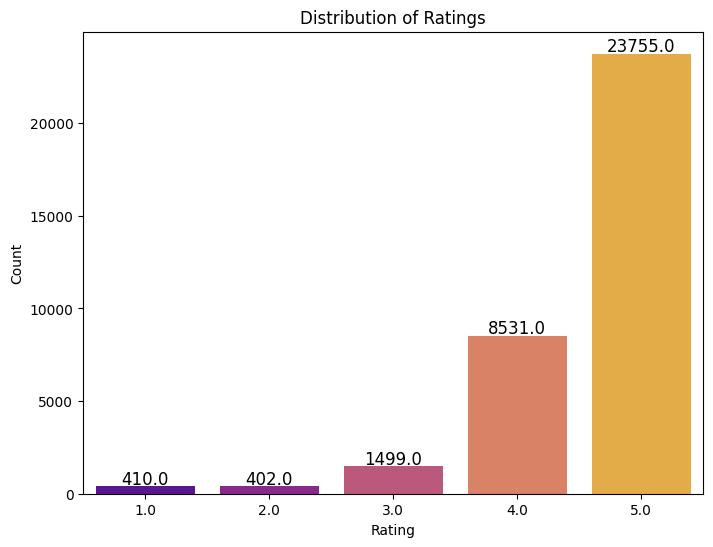

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='reviews.rating', data=cleaned_review, palette='plasma')
plt.title('Distribution of Ratings')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
              textcoords='offset points')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


<ipython-input-20-238bd1a2f4b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=most_reviewed_products.index, x=most_reviewed_products.values, palette="mako")
) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


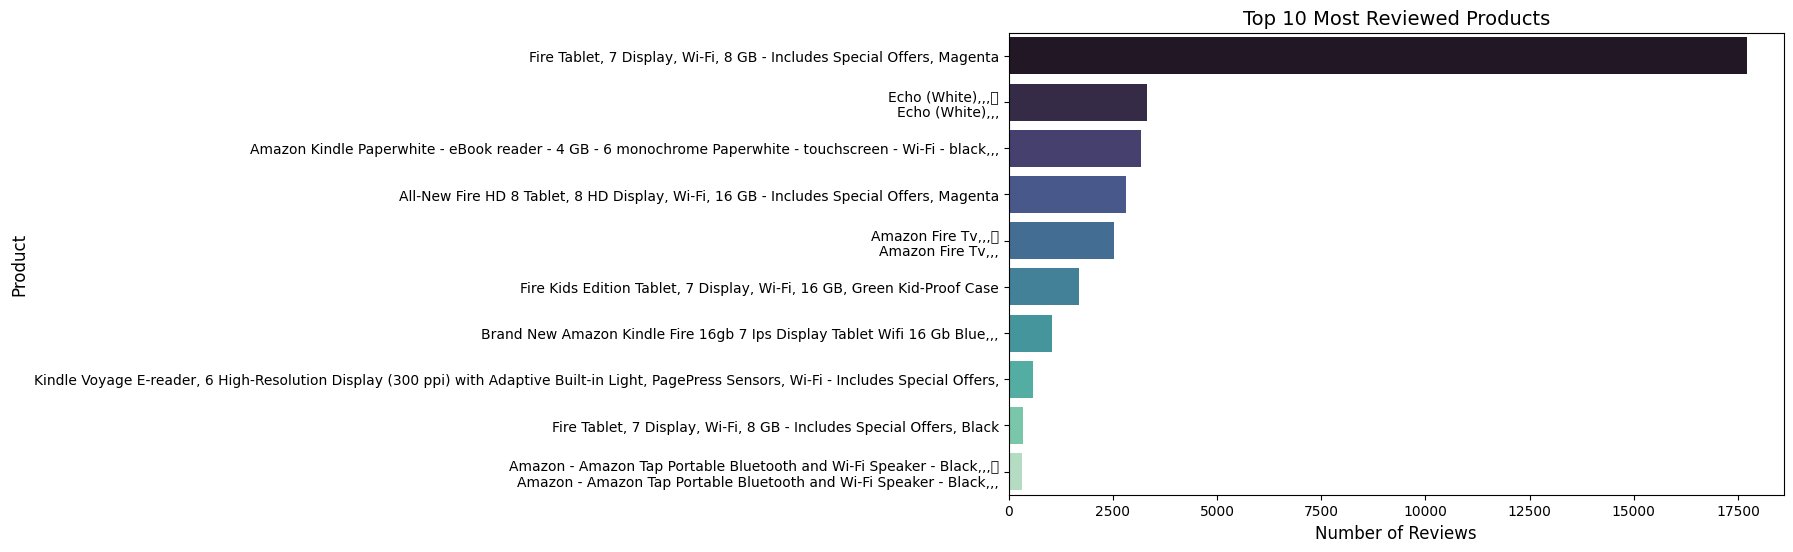

In [ ]:
most_reviewed_products = cleaned_review['name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=most_reviewed_products.index, x=most_reviewed_products.values, palette="mako")


plt.title("Top 10 Most Reviewed Products", fontsize=14)
plt.xlabel("Number of Reviews", fontsize=12)
plt.ylabel("Product", fontsize=12)
plt.show()

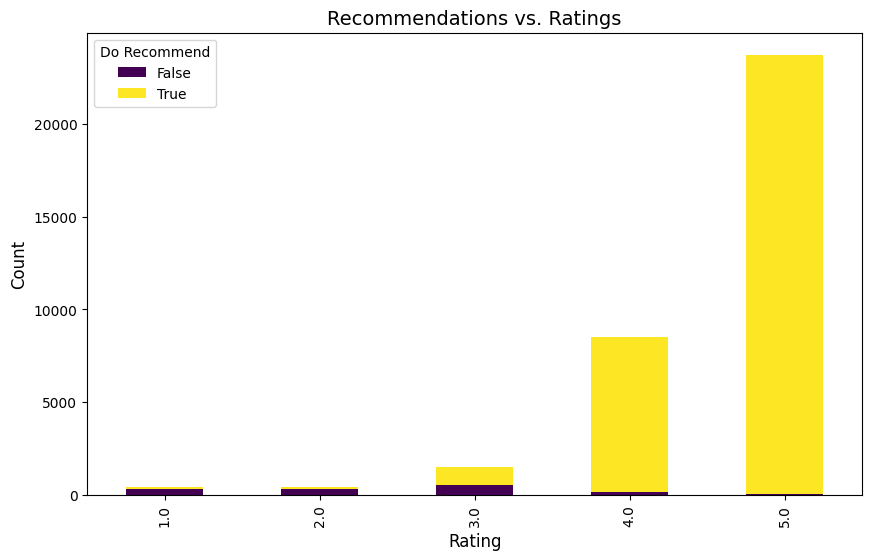

In [ ]:
# 5. Recommendations vs. Ratings
recommendation_counts = cleaned_review.groupby(["reviews.rating", "reviews.doRecommend"]).size().unstack()
recommendation_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Recommendations vs. Ratings", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Do Recommend")
plt.show()

<ipython-input-84-1df8eb277cb7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

) missing from font(s) DejaVu Sans.



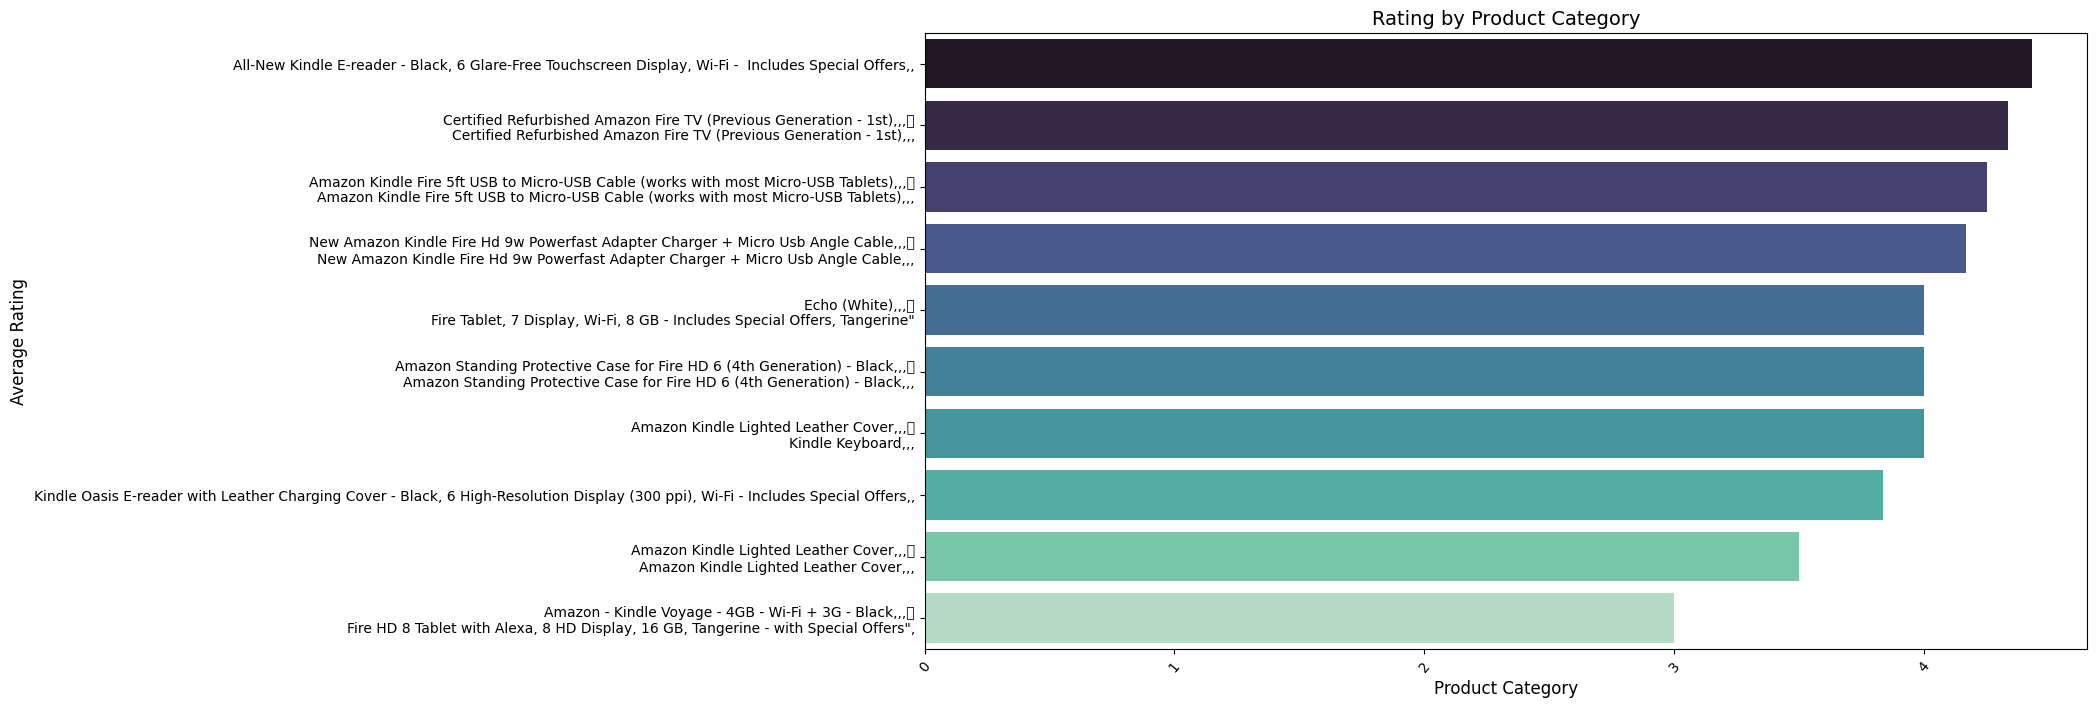

In [ ]:
average_product_rating = cleaned_review.groupby('name')['reviews.rating'].mean().sort_values(ascending=False).tail(10)
plt.figure(figsize=(15, 8))
sns.barplot(y=average_product_rating.index, x=average_product_rating.values, palette="mako")


plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Rating by Product Category", fontsize=14)
plt.xticks(rotation=50)  # Rotate labels if too long
plt.show()

<ipython-input-83-00352a6376e9>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

) missing from font(s) DejaVu Sans.



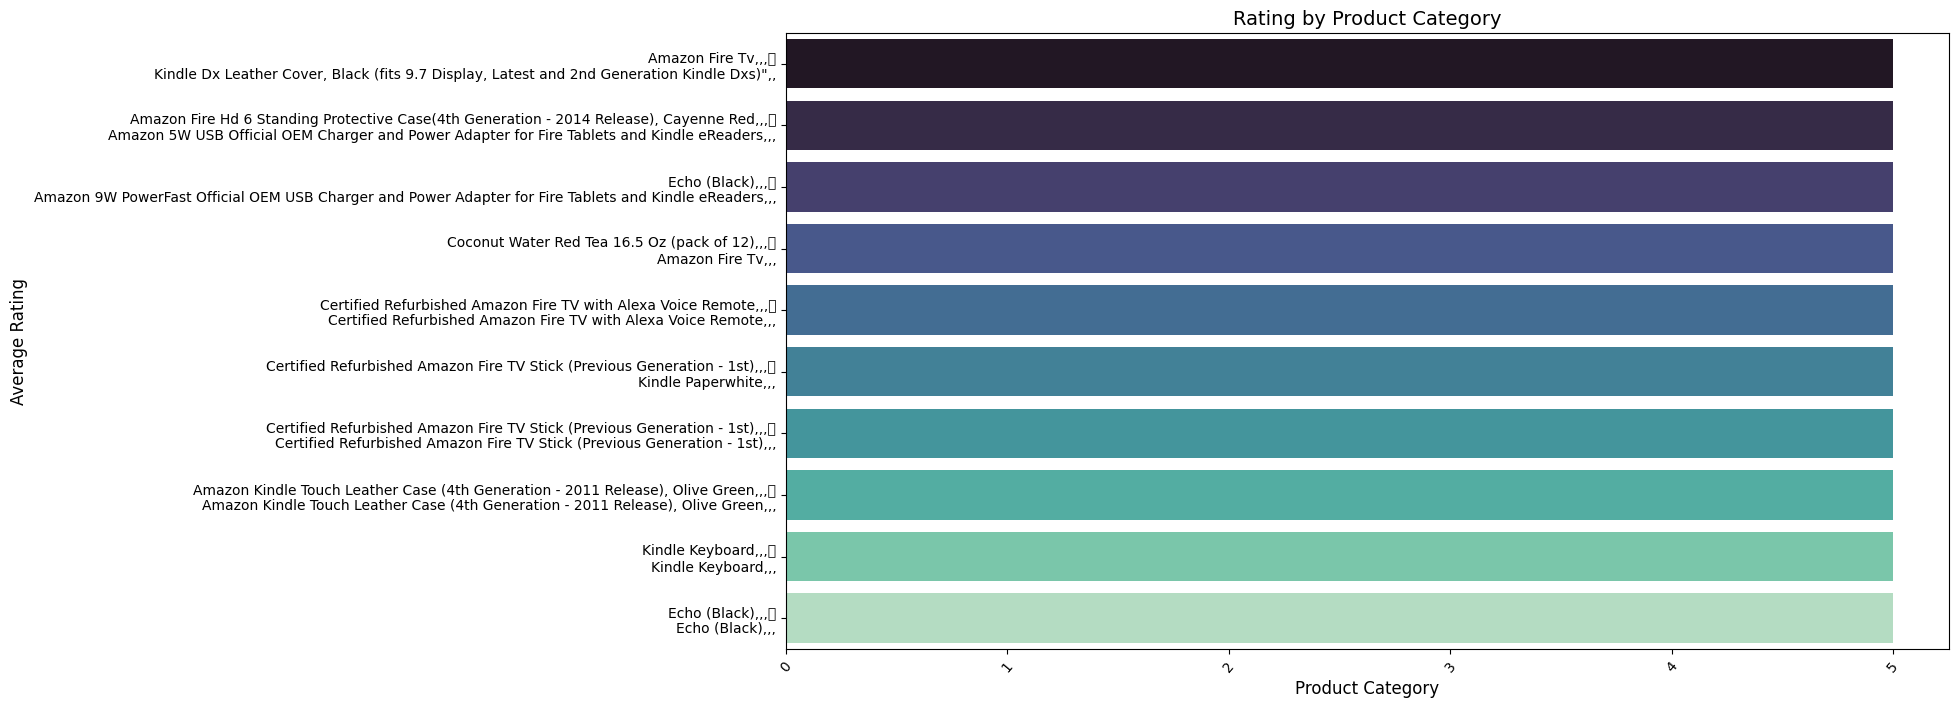

In [ ]:
average_product_rating = cleaned_review.groupby('name')['reviews.rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(15, 8))
sns.barplot(y=average_product_rating.index, x=average_product_rating.values, palette="mako")


plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Rating by Product Category", fontsize=14)
plt.xticks(rotation=50)  # Rotate labels if too long
plt.show()

In [ ]:
# Create responded category
cleaned_review['rated'] = cleaned_review['reviews.rating'].notna()
print(cleaned_review['rated'].value_counts())
cleaned_review.head()


rated
True    34597
Name: count, dtype: int64


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,rated
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter,True
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman,True
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,True
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,4.00,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,True
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,True


In [ ]:
cleaned_review['fill_review'] = np.where(cleaned_review['reviews.rating'].isnull(), 'Not Rated', 'Rated')

cleaned_review.value_counts('fill_review', normalize = True)


,proportion
fill_review,
Rated,1.00


In [ ]:
cleaned_review.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.doRecommend', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.username', 'rated', 'fill_review'],
      dtype='object')

## Customer Satisfaction

Generate a column to indicate if a customer has satisfied with the service.

* Satisfied: Rating 4-5
* Not Satisified: Rating  < 4


In [ ]:
# Create satisfaction category
cleaned_review['satisfied'] = cleaned_review['reviews.rating'].apply(lambda x: 'Satisfied' if x >= 4 else 'Not Satisfied' if pd.notna(x) else 'Not reviewed')
print(cleaned_review['satisfied'].value_counts())
cleaned_review.tail()

satisfied
Satisfied        32286
Not Satisfied     2311
Name: count, dtype: int64


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,rated,fill_review,satisfied
34655,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,3.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris,True,Rated,Not Satisfied
34656,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,1.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart,True,Rated,Not Satisfied
34657,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,1.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson,True,Rated,Not Satisfied
34658,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,1.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer,True,Rated,Not Satisfied
34659,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,1.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,to spite the fact that i have nothing but good...,as with everyone else,sandi,True,Rated,Not Satisfied


<ipython-input-28-47d6871a6892>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='satisfied', data=cleaned_review, palette='viridis')


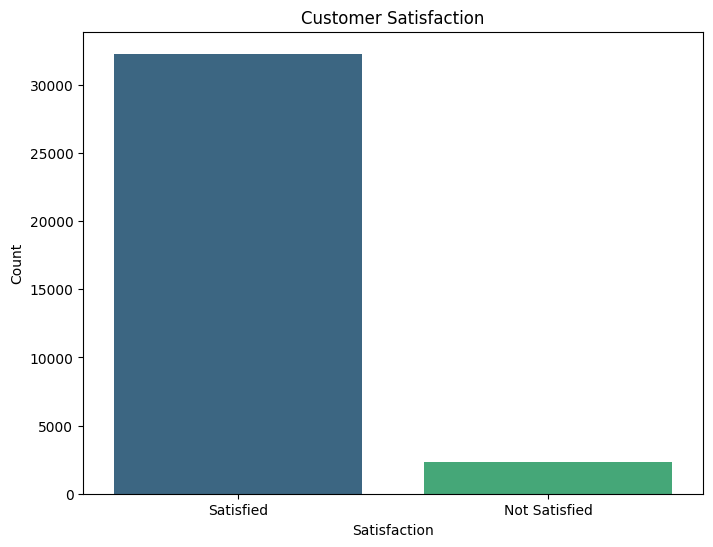

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='satisfied', data=cleaned_review, palette='viridis')
plt.title('Customer Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

In [ ]:
product_satisfaction = cleaned_review.groupby('name')['reviews.rating'].mean().sort_values(ascending=False).head(10)

In [ ]:
# overall CSAT

overall_csat_score = cleaned_review['reviews.rating'].mean()


print(f"Overall CSAT Score (Average Rating): {overall_csat_score:.2f}")

Overall CSAT Score (Average Rating): 4.58


In [ ]:
#CSAT Score, satisfaction score Rate above 4(Positive CSAT)
csat_high_ratings = cleaned_review[cleaned_review['reviews.rating'] >= 4].shape[0]
csat_total_responses = cleaned_review.shape[0]
csat_score = (csat_high_ratings / csat_total_responses) * 100
print(f"CSAT Score: {csat_score:.2f}%")

CSAT Score: 93.32%


In [ ]:
import plotly.graph_objects as go
percentage_value = csat_score
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=percentage_value,  # Set the percentage value
    number={'suffix': "%", 'valueformat': '.1f'},  # Add % symbol and 1 decimal place
    title={'text': "Customer Satisfaction (CSAT)", 'font': {'size': 24}},
    gauge={
        'axis': {
            'range': [0, 100],            # Set range from 0 to 100
            'tickmode': 'array',         # Explicitly set tick values
            'tickvals': [0, 25, 50, 75, 100],  # Tick positions
            'ticktext': ['0%', '25%', '50%', '75%', '100%'],  # Custom tick labels
        },
        'bar': {'color': "blue"},  # Color of the needle/bar


    }
))

# Display the chart
fig.show()

In [ ]:
cleaned_review['satisfied_score'] = np.where(cleaned_review['reviews.rating'] >= 4 , 1, 0)

cleaned_review.value_counts('satisfied_score', normalize = True)

,proportion
satisfied_score,
1,0.93
0,0.07


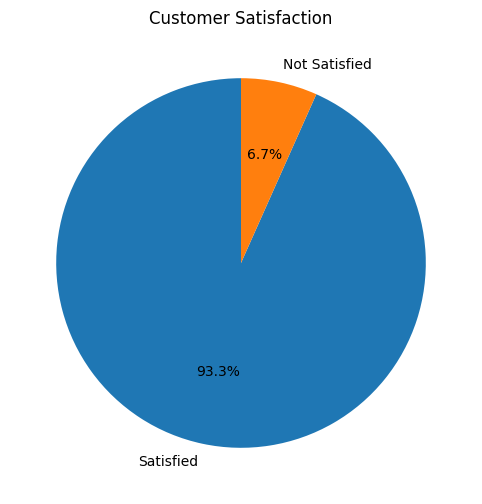

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(cleaned_review['satisfied'].value_counts(), labels=['Satisfied', 'Not Satisfied'], autopct='%1.1f%%', startangle=90)
plt.title('Customer Satisfaction')
plt.show()

## NPS Score

Generate NPS Category based on the likelihood to recommend:

from data set columnn reviews.recomend





In [ ]:
cleaned_review['reviews.doRecommend'].value_counts()


,count
reviews.doRecommend,
True,33213
False,1384


<ipython-input-40-5f2caa161841>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




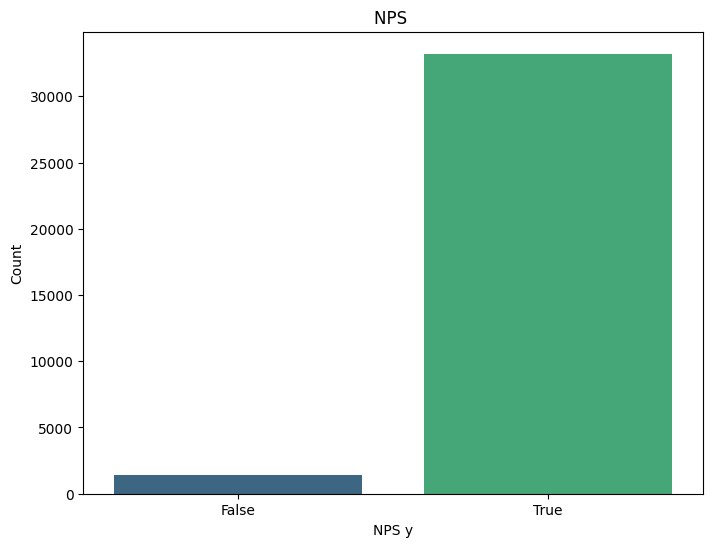

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='reviews.doRecommend', data=cleaned_review,  palette='viridis')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', fontsize=1
              , color='black', xytext=(0, 5))
plt.title('NPS ')
plt.xlabel('NPS y')
plt.ylabel('Count')
plt.show()

In [ ]:
cleaned_review['nps_category'] = cleaned_review['reviews.doRecommend'].apply(lambda x: 'Recommended' if x else 'Not Recommended')
cleaned_review.value_counts('nps_category', normalize = True)

,proportion
nps_category,
Recommended,0.96
Not Recommended,0.04


In [ ]:
cleaned_review.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,rated,fill_review,satisfied,satisfied_score,nps_category
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter,True,Rated,Satisfied,1,Recommended
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman,True,Rated,Satisfied,1,Recommended
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,True,Rated,Satisfied,1,Recommended
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,4.00,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,True,Rated,Satisfied,1,Recommended
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,True,Rated,Satisfied,1,Recommended


In [ ]:
nps_counts = cleaned_review['nps_category'].value_counts()
recommended_count = nps_counts.get('Recommended', 0)
not_recommended_count = nps_counts.get('Not Recommended', 0)
total_count = recommended_count + not_recommended_count
not_recomend = nps_counts.get("Not Recomended", 0)
nps_score = ((recommended_count - not_recommended_count) / total_count) * 100
print(f"NPS Score: {nps_score:.2f}%")

NPS Score: 92.00%


In [ ]:
percentage_value = nps_score
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=percentage_value,  # Set the percentage value
    number={'suffix': "%", 'valueformat': '.2f'},  # Add % symbol and 1 decimal place
    title={'text': "NPS SCore", 'font': {'size': 24}},
    gauge={
        'axis': {
            'range': [0, 100],            # Set range from 0 to 100
            'tickmode': 'array',         # Explicitly set tick values
            'tickvals': [0, 25, 50, 75, 100],  # Tick positions
            'ticktext': ['0%', '25%', '50%', '75%', '100%'],  # Custom tick labels
        },
        'bar': {'color': "blue"},  # Color of the needle/bar


    }
))

# Display the chart
fig.show()

## Sentiment



### Text Cleansing

Prepare the text data before collecting the sentiment.

In [ ]:
cleaned_review[['reviews.text','reviews.rating']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 34597 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.text    34597 non-null  object 
 1   reviews.rating  34597 non-null  float64
dtypes: float64(1), object(1)
memory usage: 810.9+ KB


In [ ]:
cleaned_review[['reviews.text','reviews.rating']].isnull().any()

,0
reviews.text,False
reviews.rating,False


In [ ]:
import re

def cleansing_text(x):
  # clean double whitespace
  out_text = ' '.join(x.split())

  # clean url
  out_text = re.sub(r"http\S+|www\S+|https\S+", 'http', out_text)

  # clean username
  out_text = re.sub(r"@\S+", '@user', out_text)

  return(out_text)



In [ ]:
# Apply cleansing to review
cleaned_review['clean_text'] = cleaned_review['reviews.text'].apply(cleansing_text)
cleaned_review.head(10)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,rated,fill_review,satisfied,satisfied_score,nps_category,clean_text
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter,True,Rated,Satisfied,1,Recommended,This product so far has not disappointed. My c...
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman,True,Rated,Satisfied,1,Recommended,great for beginner or experienced person. Boug...
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,True,Rated,Satisfied,1,Recommended,Inexpensive tablet for him to use and learn on...
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,4.00,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,True,Rated,Satisfied,1,Recommended,I've had my Fire HD 8 two weeks now and I love...
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,True,Rated,Satisfied,1,Recommended,I bought this for my grand daughter when she c...
5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,tklit,True,Rated,Satisfied,1,Recommended,This amazon fire 8 inch tablet is the perfect ...
6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12 00:00:00+00:00,True,0.00,4.00,http://reviews.bestbuy.com/3545/5620406/review...,"Great for e-reading on the go, nice and light ...",great e-reader tablet,Droi,True,Rated,Satisfied,1,Recommended,"Great for e-reading on the go, nice and light ..."
7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,"I gave this as a Christmas gift to my inlaws, ...",Great for gifts,Kacy,True,Rated,Satisfied,1,Recommended,"I gave this as a Christmas gift to my inlaws, ..."
8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Elect

### Sentiment Analysis

Create a sentiment categories using algorithm of your own choice.

In [ ]:
sentiment_score = {1: 0,
                   2: 0,
                   3: 1,
                   4: 2,
                   5: 2}
sentiment = {0: 'NEGATIVE',
             1: 'NEUTRAL',
             2: 'POSITIVE'}
cleaned_review['sentiment_score'] = cleaned_review ['reviews.rating'].map(sentiment_score)
cleaned_review['sentiment'] = cleaned_review['sentiment_score'].map(sentiment)
cleaned_review.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,rated,fill_review,satisfied,satisfied_score,nps_category,clean_text,sentiment_score,sentiment
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter,True,Rated,Satisfied,1,Recommended,This product so far has not disappointed. My c...,2,POSITIVE
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman,True,Rated,Satisfied,1,Recommended,great for beginner or experienced person. Boug...,2,POSITIVE
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,True,Rated,Satisfied,1,Recommended,Inexpensive tablet for him to use and learn on...,2,POSITIVE
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,4.00,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,True,Rated,Satisfied,1,Recommended,I've had my Fire HD 8 two weeks now and I love...,2,POSITIVE
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,True,Rated,Satisfied,1,Recommended,I bought this for my grand daughter when she c...,2,POSITIVE


In [ ]:
cleaned_review.tail()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,rated,fill_review,satisfied,satisfied_score,nps_category,clean_text,sentiment_score,sentiment
34655,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,3.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris,True,Rated,Not Satisfied,0,Recommended,This is not appreciably faster than any other ...,1,NEUTRAL
34656,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,1.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart,True,Rated,Not Satisfied,0,Recommended,Amazon should include this charger with the Ki...,0,NEGATIVE
34657,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,1.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson,True,Rated,Not Satisfied,0,Recommended,Love my Kindle Fire but I am really disappoint...,0,NEGATIVE
34658,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,1.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer,True,Rated,Not Satisfied,0,Recommended,I was surprised to find it did not come with a...,0,NEGATIVE
34659,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,1.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,to spite the fact that i have nothing but good...,as with everyone else,sandi,True,Rated,Not Satisfied,0,Recommended,to spite the fact that i have nothing but good...,0,NEGATIVE


In [ ]:
#Vader Analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon for sentiment score
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Initialize the Sentiment Intensity Analyzer
model_sia = SentimentIntensityAnalyzer()

# Get polarity score
cleaned_review['vader_score'] = cleaned_review['clean_text'].apply(model_sia.polarity_scores)
cleaned_review['vader_compound'] = cleaned_review['vader_score'].apply(lambda x: x['compound'])

# Create sentiment category
sent_value = ['Positive', 'Neutral', 'Negative']
sent_condition = [cleaned_review['vader_compound'] > 0.05,
                  (cleaned_review['vader_compound'] <= 0.05) & (cleaned_review['vader_compound'] >= - 0.05),
                  cleaned_review['vader_compound'] < -0.05
                  ]

cleaned_review['vader_sentiment'] = np.select(sent_condition, sent_value)

cleaned_review.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,rated,fill_review,satisfied,satisfied_score,nps_category,clean_text,sentiment_score,sentiment,vader_score,vader_compound,vader_sentiment
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,Adapter,True,Rated,Satisfied,1,Recommended,This product so far has not disappointed. My c...,2,POSITIVE,"{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp...",0.92,Positive
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,truman,True,Rated,Satisfied,1,Recommended,great for beginner or experienced person. Boug...,2,POSITIVE,"{'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'comp...",0.89,Positive
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,True,Rated,Satisfied,1,Recommended,Inexpensive tablet for him to use and learn on...,2,POSITIVE,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...",0.44,Positive
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.00,4.00,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,True,Rated,Satisfied,1,Recommended,I've had my Fire HD 8 two weeks now and I love...,2,POSITIVE,"{'neg': 0.036, 'neu': 0.683, 'pos': 0.281, 'co...",0.99,Positive
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12 00:00:00+00:00,True,0.00,5.00,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,True,Rated,Satisfied,1,Recommended,I bought this for my grand daughter when she c...,2,POSITIVE,"{'neg': 0.0, 'neu': 0.914, 'pos': 0.086, 'comp...",0.79,Positive


In [ ]:
cleaned_review.tail()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,rated,fill_review,satisfied,satisfied_score,nps_category,clean_text,sentiment_score,sentiment,vader_score,vader_compound,vader_sentiment
34655,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,3.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,Kris,True,Rated,Not Satisfied,0,Recommended,This is not appreciably faster than any other ...,1,NEUTRAL,"{'neg': 0.069, 'neu': 0.824, 'pos': 0.107, 'co...",0.86,Positive
34656,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,1.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,Jonathan Stewart,True,Rated,Not Satisfied,0,Recommended,Amazon should include this charger with the Ki...,0,NEGATIVE,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.60,Positive
34657,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,1.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,J Lawson,True,Rated,Not Satisfied,0,Recommended,Love my Kindle Fire but I am really disappoint...,0,NEGATIVE,"{'neg': 0.095, 'neu': 0.798, 'pos': 0.108, 'co...",-0.04,Neutral
34658,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,1.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,I was surprised to find it did not come with a...,Not worth the money,Just the Buyer,True,Rated,Not Satisfied,0,Recommended,I was surprised to find it did not come with a...,0,NEGATIVE,"{'neg': 0.051, 'neu': 0.871, 'pos': 0.078, 'co...",0.07,Positive
34659,AVpfiBlyLJeJML43-4Tp,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",NaT,True,0.00,1.00,http://www.amazon.com/Amazon-PowerFast-Adapter...,to spite the fact that i have nothing but good...,as with everyone else,sandi,True,Rated,Not Satisfied,0,Recommended,to spite the fact that i have nothing but good...,0,NEGATIVE,"{'neg': 0.13, 'neu': 0.702, 'pos': 0.168, 'com...",0.72,Positive


In [ ]:
cleaned_review['vader_sentiment'].value_counts()

,count
vader_sentiment,
Positive,30973
Negative,2082
Neutral,1542


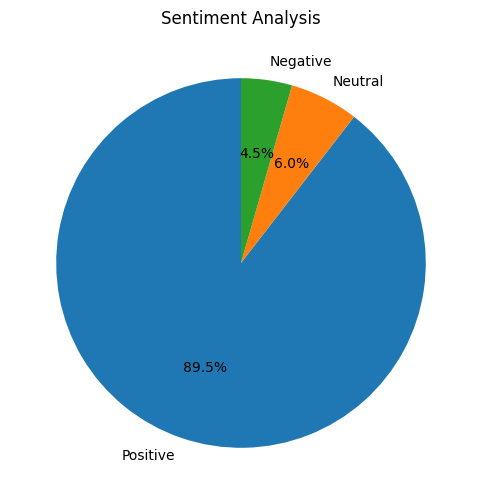

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(cleaned_review['vader_sentiment'].value_counts(), labels=['Positive', 'Neutral', 'Negative'], autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Analysis')
plt.show()

In [ ]:
cleaned_review['sentiment'].value_counts()

,count
sentiment,
POSITIVE,32286
NEUTRAL,1499
NEGATIVE,812


<ipython-input-74-fb7d5dbf8cfb>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




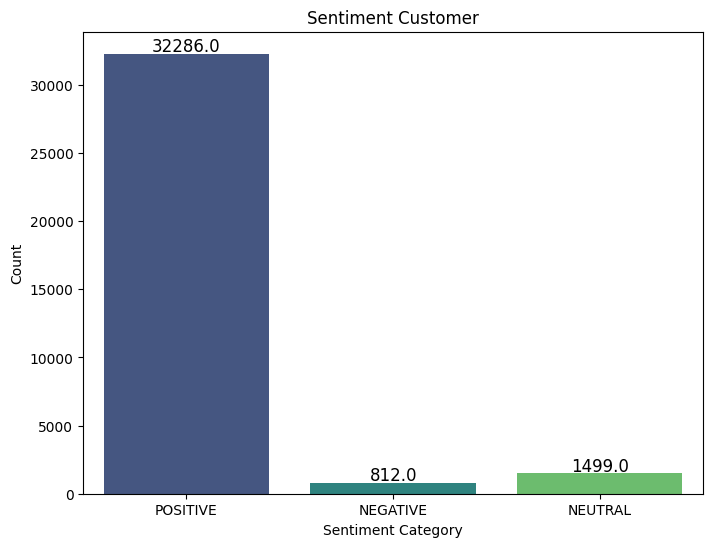

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='sentiment', data=cleaned_review,  palette='viridis')
for p in ax.patches:
  ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
              textcoords='offset points')

plt.title('Sentiment Customer')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

## Save Results

Save the review data with NPS category and sentiment information to new csv.

In [ ]:
df_final = cleaned_review.copy()

In [ ]:
all_words = pd.Series(' '.join(cleaned_review['reviews.text']).split())

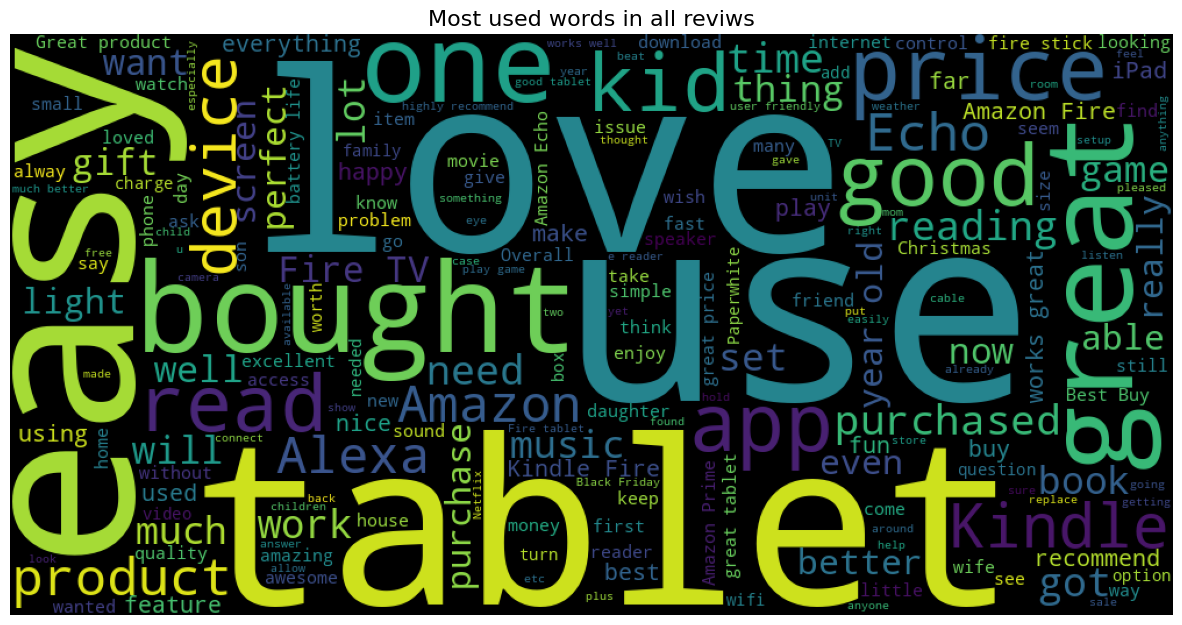

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

all_words = pd.Series(' '.join(cleaned_review['reviews.text']).split())

wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

In [ ]:
# get words used positive reivews
positiveWords = pd.Series(' '.join(cleaned_review[cleaned_review['sentiment']=='POSITIVE']['reviews.text']).split())

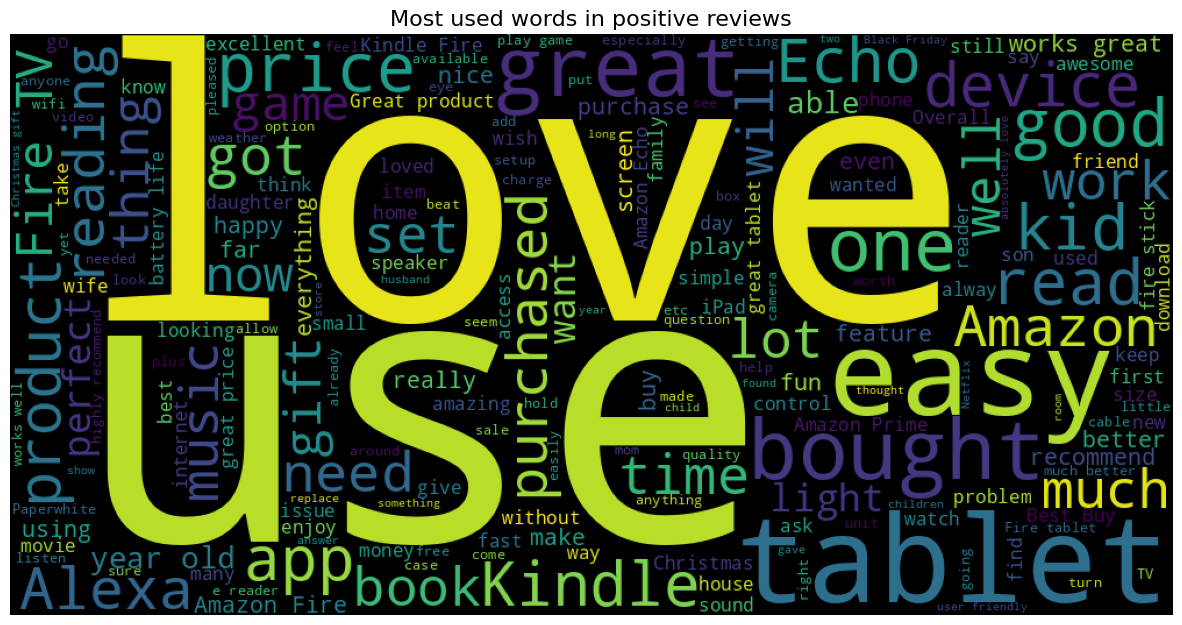

In [ ]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

In [ ]:
# get words used negative reivews
negativeWords = pd.Series(' '.join(cleaned_review[cleaned_review['sentiment']=='NEGATIVE']['reviews.text']).split())

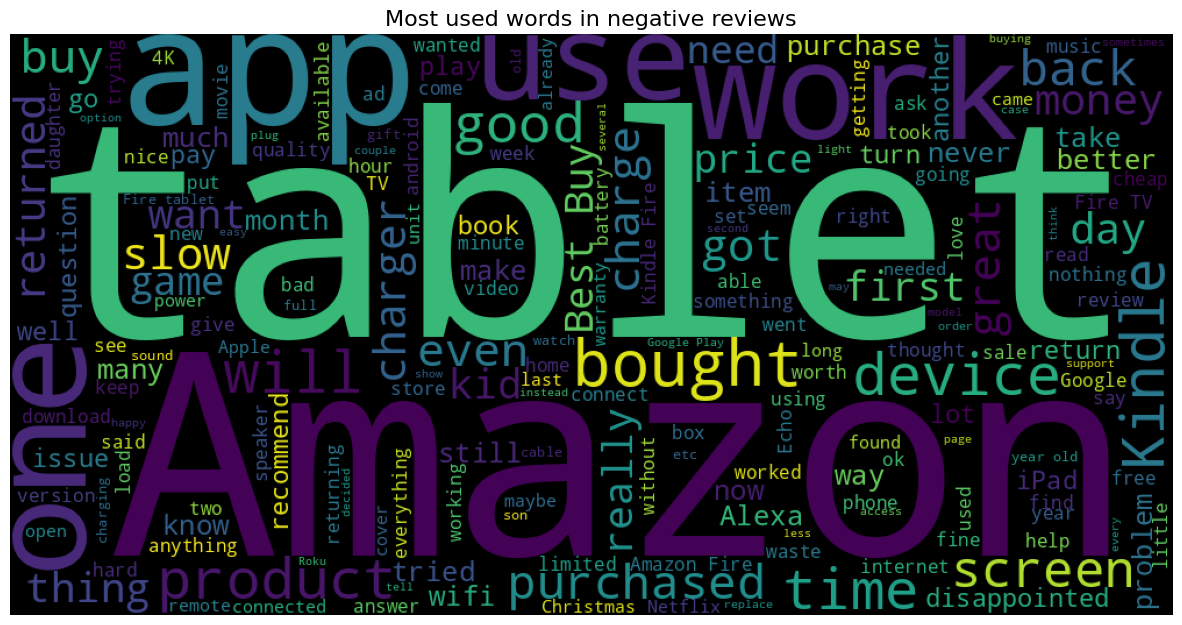

In [ ]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

In [ ]:
# Save the data
file_output = data_path + 'Amazone_sentiment_data.csv'
df_final.to_csv(file_output, index = False)
